In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/EURUSD%20-%2015m%20-%202010-2016/EURUSD_15m_BID_sample.csv")
df.head()

,Time,Open,High,Low,Close,Volume
0,2015-12-29 00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08
1,2015-12-29 00:15,1.09772,1.09800,1.09770,1.09790,4.459200e+08
2,2015-12-29 00:30,1.09790,1.09805,1.09782,1.09792,1.210700e+09
3,2015-12-29 00:45,1.09792,1.09825,1.09775,1.09808,1.116910e+09
4,2015-12-29 01:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14880 entries, 0 to 14879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14880 non-null  object 
 1   Open    14880 non-null  float64
 2   High    14880 non-null  float64
 3   Low     14880 non-null  float64
 4   Close   14880 non-null  float64
 5   Volume  14880 non-null  float64
dtypes: float64(5), object(1)
memory usage: 697.6+ KB


In [24]:
df.count()

Time      14880
Open      14880
High      14880
Low       14880
Close     14880
Volume    14880
dtype: int64

In [25]:
df.shape

(14880, 6)

In [27]:
df.index.min(), df.index.max()

(0, 14879)

In [28]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [29]:
df.nunique()

Time      14876
Open       5086
High       5073
Low        5008
Close      5084
Volume    10466
dtype: int64

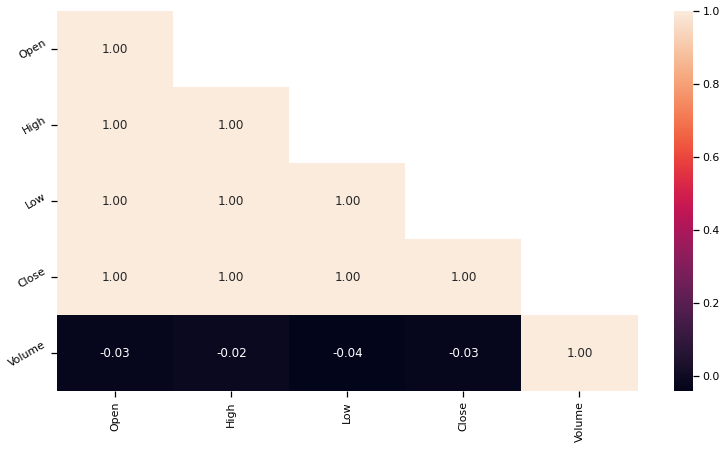

In [31]:
import matplotlib.pyplot as plt 

import seaborn as sns 
corr =df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [32]:
df.rename(columns={'Time' : 'timestamp', 'Open' : 'open', 'Close' : 'close', 
                   'High' : 'high', 'Low' : 'low', 'Close' : 'close', 'Volume' : 'volume'}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df.set_index('timestamp', inplace=True)
df = df.astype(float)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2015-12-29 00:00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08
2015-12-29 00:15:00,1.09772,1.09800,1.09770,1.09790,4.459200e+08
2015-12-29 00:30:00,1.09790,1.09805,1.09782,1.09792,1.210700e+09
2015-12-29 00:45:00,1.09792,1.09825,1.09775,1.09808,1.116910e+09
2015-12-29 01:00:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08


In [36]:
df['low'].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09741
2015-12-29 00:15:00    1.09770
2015-12-29 00:30:00    1.09782
2015-12-29 00:45:00    1.09775
2015-12-29 01:00:00    1.09791
                        ...   
2016-05-31 22:45:00    1.11451
2016-05-31 23:00:00    1.11473
2016-05-31 23:15:00    1.11478
2016-05-31 23:30:00    1.11465
2016-05-31 23:45:00    1.11426
Name: low, Length: 14880, dtype: float64>

In [35]:
df["high"].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09783
2015-12-29 00:15:00    1.09800
2015-12-29 00:30:00    1.09805
2015-12-29 00:45:00    1.09825
2015-12-29 01:00:00    1.09824
                        ...   
2016-05-31 22:45:00    1.11495
2016-05-31 23:00:00    1.11517
2016-05-31 23:15:00    1.11515
2016-05-31 23:30:00    1.11506
2016-05-31 23:45:00    1.11488
Name: high, Length: 14880, dtype: float64>

In [37]:
df['avg_price'] = (df['low'] + df['high'])/2 

In [38]:
df["avg_price"].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.097620
2015-12-29 00:15:00    1.097850
2015-12-29 00:30:00    1.097935
2015-12-29 00:45:00    1.098000
2015-12-29 01:00:00    1.098075
                         ...   
2016-05-31 22:45:00    1.114730
2016-05-31 23:00:00    1.114950
2016-05-31 23:15:00    1.114965
2016-05-31 23:30:00    1.114855
2016-05-31 23:45:00    1.114570
Name: avg_price, Length: 14880, dtype: float64>

In [39]:
df["low"].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09741
2015-12-29 00:15:00    1.09770
2015-12-29 00:30:00    1.09782
2015-12-29 00:45:00    1.09775
2015-12-29 01:00:00    1.09791
                        ...   
2016-05-31 22:45:00    1.11451
2016-05-31 23:00:00    1.11473
2016-05-31 23:15:00    1.11478
2016-05-31 23:30:00    1.11465
2016-05-31 23:45:00    1.11426
Name: low, Length: 14880, dtype: float64>

In [40]:
df['high'].head 

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09783
2015-12-29 00:15:00    1.09800
2015-12-29 00:30:00    1.09805
2015-12-29 00:45:00    1.09825
2015-12-29 01:00:00    1.09824
                        ...   
2016-05-31 22:45:00    1.11495
2016-05-31 23:00:00    1.11517
2016-05-31 23:15:00    1.11515
2016-05-31 23:30:00    1.11506
2016-05-31 23:45:00    1.11488
Name: high, Length: 14880, dtype: float64>

In [41]:
df["open"].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09746
2015-12-29 00:15:00    1.09772
2015-12-29 00:30:00    1.09790
2015-12-29 00:45:00    1.09792
2015-12-29 01:00:00    1.09808
                        ...   
2016-05-31 22:45:00    1.11454
2016-05-31 23:00:00    1.11476
2016-05-31 23:15:00    1.11479
2016-05-31 23:30:00    1.11503
2016-05-31 23:45:00    1.11480
Name: open, Length: 14880, dtype: float64>

In [42]:
df["close"].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.09772
2015-12-29 00:15:00    1.09790
2015-12-29 00:30:00    1.09792
2015-12-29 00:45:00    1.09808
2015-12-29 01:00:00    1.09822
                        ...   
2016-05-31 22:45:00    1.11475
2016-05-31 23:00:00    1.11480
2016-05-31 23:15:00    1.11503
2016-05-31 23:30:00    1.11482
2016-05-31 23:45:00    1.11476
Name: close, Length: 14880, dtype: float64>

In [43]:
df['ohlc_price'] = (df['low'] + df['high'] + df['open'] + df['close'])/4

In [45]:
df['ohlc_price'] = (df['low'] + df['high'] + df['open'] + df['close'])/4
df['ohlc_price'].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    1.097605
2015-12-29 00:15:00    1.097830
2015-12-29 00:30:00    1.097923
2015-12-29 00:45:00    1.098000
2015-12-29 01:00:00    1.098113
                         ...   
2016-05-31 22:45:00    1.114688
2016-05-31 23:00:00    1.114865
2016-05-31 23:15:00    1.114938
2016-05-31 23:30:00    1.114890
2016-05-31 23:45:00    1.114675
Name: ohlc_price, Length: 14880, dtype: float64>

In [46]:
df['oc_diff']    = df['open'] - df['close']
df['oc_diff'].head

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00   -0.00026
2015-12-29 00:15:00   -0.00018
2015-12-29 00:30:00   -0.00002
2015-12-29 00:45:00   -0.00016
2015-12-29 01:00:00   -0.00014
                        ...   
2016-05-31 22:45:00   -0.00021
2016-05-31 23:00:00   -0.00004
2016-05-31 23:15:00   -0.00024
2016-05-31 23:30:00    0.00021
2016-05-31 23:45:00    0.00004
Name: oc_diff, Length: 14880, dtype: float64>

In [47]:
df['range']     = df['high'] - df['low']
df['range'].head 

<bound method NDFrame.head of timestamp
2015-12-29 00:00:00    0.00042
2015-12-29 00:15:00    0.00030
2015-12-29 00:30:00    0.00023
2015-12-29 00:45:00    0.00050
2015-12-29 01:00:00    0.00033
                        ...   
2016-05-31 22:45:00    0.00044
2016-05-31 23:00:00    0.00044
2016-05-31 23:15:00    0.00037
2016-05-31 23:30:00    0.00041
2016-05-31 23:45:00    0.00062
Name: range, Length: 14880, dtype: float64>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


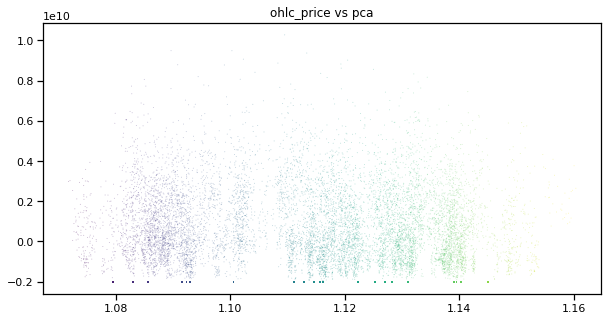

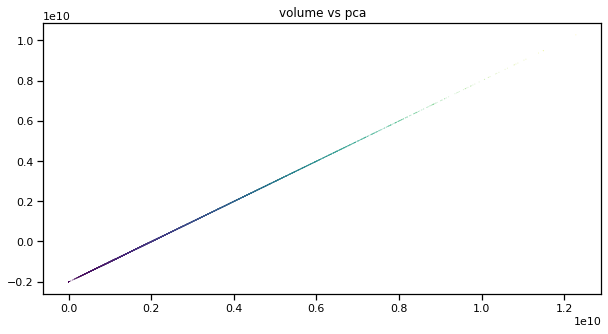

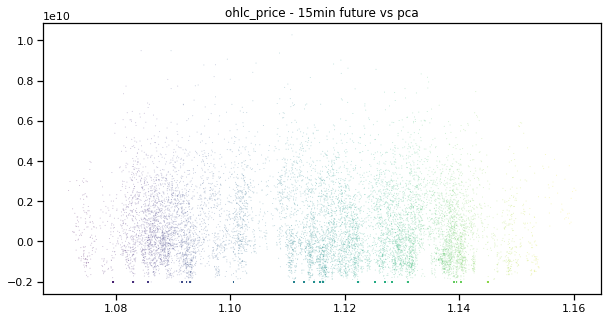

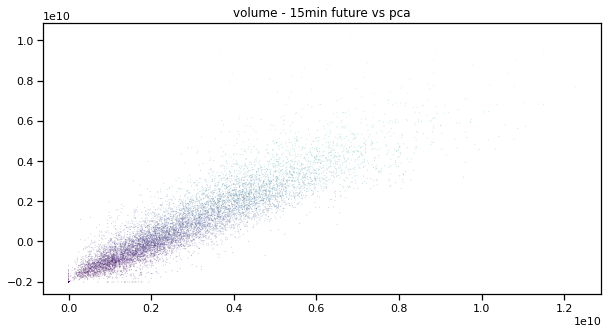

In [48]:
df['momentum']  = df['volume'] * (df['open'] - df['close'])
df['avg_price'] = (df['low'] + df['high'])/2
df['range']     = df['high'] - df['low']
df['ohlc_price'] = (df['low'] + df['high'] + df['open'] + df['close'])/4
df['oc_diff']    = df['open'] - df['close']



df['hour'] = df.index.hour
df['day']  = df.index.weekday
df['week'] = df.index.week
from sklearn.decomposition import PCA

dataset = df.copy().values.astype('float32')
pca_features = df.columns.tolist()

pca = PCA(n_components=1)
df['pca'] = pca.fit_transform(dataset)
import matplotlib.colors as colors 
import matplotlib.cm as cm 
import pylab 

plt.figure(figsize=(10,5)) 
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price vs pca') 
plt.show()

plt.figure(figsize=(10,5)) 
norm = colors.Normalize(df['volume'].values.min(), df['volume'].values.max())
color = cm.viridis(norm(df['volume'].values))
plt.scatter(df['volume'].values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('volume vs pca')
plt.show()

plt.figure(figsize=(10,5)) 
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].shift().values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price - 15min future vs pca') #ตั้งชื่อหัวเรื่อง
plt.show()

plt.figure(figsize=(10,5)) 
norm = colors.Normalize(df['volume'].values.min(), df['volume'].values.max())
color = cm.viridis(norm(df['volume'].values))
plt.scatter(df['volume'].shift().values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('volume - 15min future vs pca') #ตั้งชื่อหัวเรื่อง
plt.show()

In [49]:
df.head()

,open,high,low,close,volume,avg_price,ohlc_price,oc_diff,range,momentum,hour,day,week,pca
timestamp,,,,,,,,,,,,,,
2015-12-29 00:00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08,1.097620,1.097605,-0.00026,0.00042,-126536.800832,0,1,53,-1.525347e+09
2015-12-29 00:15:00,1.09772,1.09800,1.09770,1.09790,4.459200e+08,1.097850,1.097830,-0.00018,0.00030,-80265.599838,0,1,53,-1.566106e+09
2015-12-29 00:30:00,1.09790,1.09805,1.09782,1.09792,1.210700e+09,1.097935,1.097923,-0.00002,0.00023,-24214.000100,0,1,53,-8.013266e+08
2015-12-29 00:45:00,1.09792,1.09825,1.09775,1.09808,1.116910e+09,1.098000,1.098000,-0.00016,0.00050,-178705.598720,0,1,53,-8.951166e+08
2015-12-29 01:00:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08,1.098075,1.098113,-0.00014,0.00033,-70543.200420,1,1,53,-1.508146e+09


In [50]:
def create_dataset(dataset, look_back=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

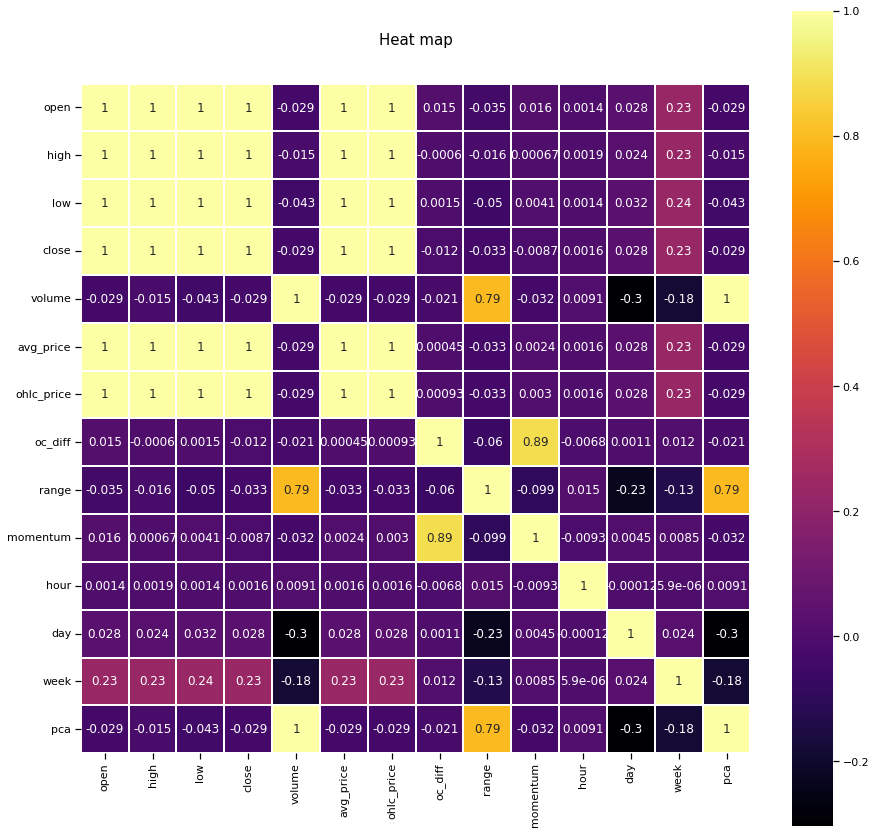

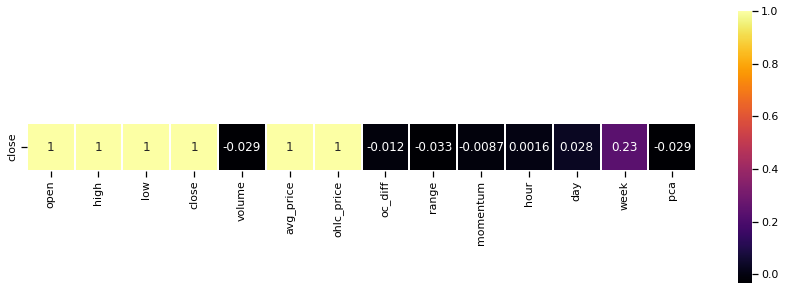

In [51]:
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Heat map', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr[corr.index == 'close'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [52]:
import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [54]:
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/EURUSD%20-%2015m%20-%202010-2016/EURUSD_15m_BID_sample.csv')
df1.head()

,Time,Open,High,Low,Close,Volume
0,2015-12-29 00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08
1,2015-12-29 00:15,1.09772,1.09800,1.09770,1.09790,4.459200e+08
2,2015-12-29 00:30,1.09790,1.09805,1.09782,1.09792,1.210700e+09
3,2015-12-29 00:45,1.09792,1.09825,1.09775,1.09808,1.116910e+09
4,2015-12-29 01:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08


In [55]:
df1['MA'] = df1['Close'].rolling(window=50).mean()

In [56]:
df1.head(60) 

,Time,Open,High,Low,Close,Volume,MA
0,2015-12-29 00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08,NaN
1,2015-12-29 00:15,1.09772,1.09800,1.09770,1.09790,4.459200e+08,NaN
2,2015-12-29 00:30,1.09790,1.09805,1.09782,1.09792,1.210700e+09,NaN
3,2015-12-29 00:45,1.09792,1.09825,1.09775,1.09808,1.116910e+09,NaN
4,2015-12-29 01:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08,NaN
5,2015-12-29 01:15,1.09821,1.09824,1.09791,1.09815,5.840000e+08,NaN
6,2015-12-29 01:30,1.09818,1.09824,1.09791,1.09795,3.584400e+08,NaN
7,2015-12-29 01:45,1.09795,1.09818,1.09783,1.09812,3.159500e+08,NaN
8,2015-12-29 02:00,1.09813,1.09813,1.09772,1.09786,4.519100e+08,NaN
9,2015-12-29 02:15,1.09785,1.09825,1.09784,1.09798,5.044200e+08,NaN


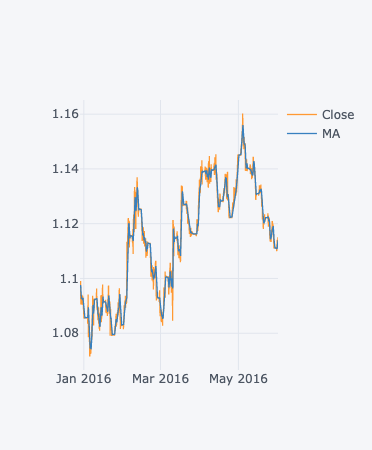

In [57]:
df1.iplot(x='Time',y=['Close','MA'])